In [3]:
import pandas as pd

In [4]:
# Load the dataset
data = pd.read_csv('train.csv')

In [5]:
print(data.head())

  policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   
2   ID00003       0.841110        0.02             0.384615           C3   
3   ID00004       0.900277        0.11             0.432692           C4   
4   ID00005       0.596403        0.11             0.634615           C5   

   population_density  make segment model fuel_type  ... is_brake_assist  \
0                4990     1       A    M1       CNG  ...              No   
1               27003     1       A    M1       CNG  ...              No   
2                4076     1       A    M1       CNG  ...              No   
3               21622     1      C1    M2    Petrol  ...             Yes   
4               34738     2       A    M3    Petrol  ...              No   

  is_power_door_locks is_central_locking  is_power_steering  \
0                  No  

In [6]:
# Check basic info
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [7]:
# Check missing values

print(data.isnull().sum())


policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [8]:
# Check unique values for each column

print(data.nunique())

policy_id                           58592
policy_tenure                       58592
age_of_car                             49
age_of_policyholder                    75
area_cluster                           22
population_density                     22
make                                    5
segment                                 6
model                                  11
fuel_type                               3
max_torque                              9
max_power                               9
engine_type                            11
airbags                                 3
is_esc                                  2
is_adjustable_steering                  2
is_tpms                                 2
is_parking_sensors                      2
is_parking_camera                       2
rear_brakes_type                        2
displacement                            9
cylinder                                2
transmission_type                       2
gear_box                          

In [9]:
cols_to_drop = ['policy_id', 'policy_tenure', 'model', 'max_torque', 'max_power']
data.drop(columns=cols_to_drop, inplace=True)

In [10]:
from sklearn.preprocessing import LabelEncoder

binary_cols = [
    'is_esc', 'is_adjustable_steering', 'is_tpms',
    'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type',
    'cylinder', 'transmission_type', 'gear_box', 'is_speed_alert', 'is_claim'
]

le = LabelEncoder()
for col in binary_cols:
    data[col] = le.fit_transform(data[col])


In [11]:
multi_class_cols = [
    'fuel_type', 'segment', 'area_cluster', 'engine_type',
    'steering_type', 'ncap_rating'
]

data = pd.get_dummies(data, columns=multi_class_cols, drop_first=True)


In [13]:
print("Final data shape:", data.shape)

Final data shape: (58592, 77)


In [14]:
print("Sample rows:\n", data.head())

Sample rows:
    age_of_car  age_of_policyholder  population_density  make  airbags  is_esc  \
0        0.05             0.644231                4990     1        2       0   
1        0.02             0.375000               27003     1        2       0   
2        0.02             0.384615                4076     1        2       0   
3        0.11             0.432692               21622     1        2       1   
4        0.11             0.634615               34738     2        2       0   

   is_adjustable_steering  is_tpms  is_parking_sensors  is_parking_camera  \
0                       0        0                   1                  0   
1                       0        0                   1                  0   
2                       0        0                   1                  0   
3                       1        0                   1                  1   
4                       0        0                   0                  1   

   ...  engine_type_G12B  engine_typ

In [15]:
print("Column types:\n", data.dtypes)

Column types:
 age_of_car             float64
age_of_policyholder    float64
population_density       int64
make                     int64
airbags                  int64
                        ...   
steering_type_Power       bool
ncap_rating_2             bool
ncap_rating_3             bool
ncap_rating_4             bool
ncap_rating_5             bool
Length: 77, dtype: object


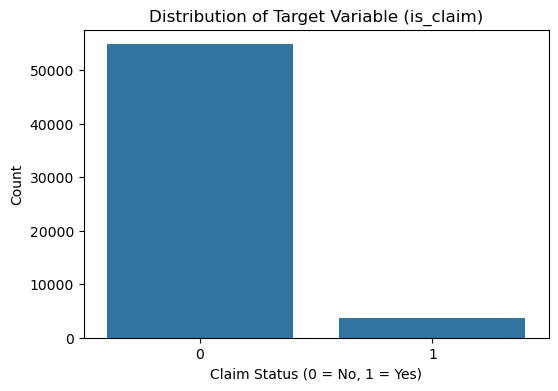

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='is_claim', data=data)
plt.title("Distribution of Target Variable (is_claim)")
plt.xlabel("Claim Status (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


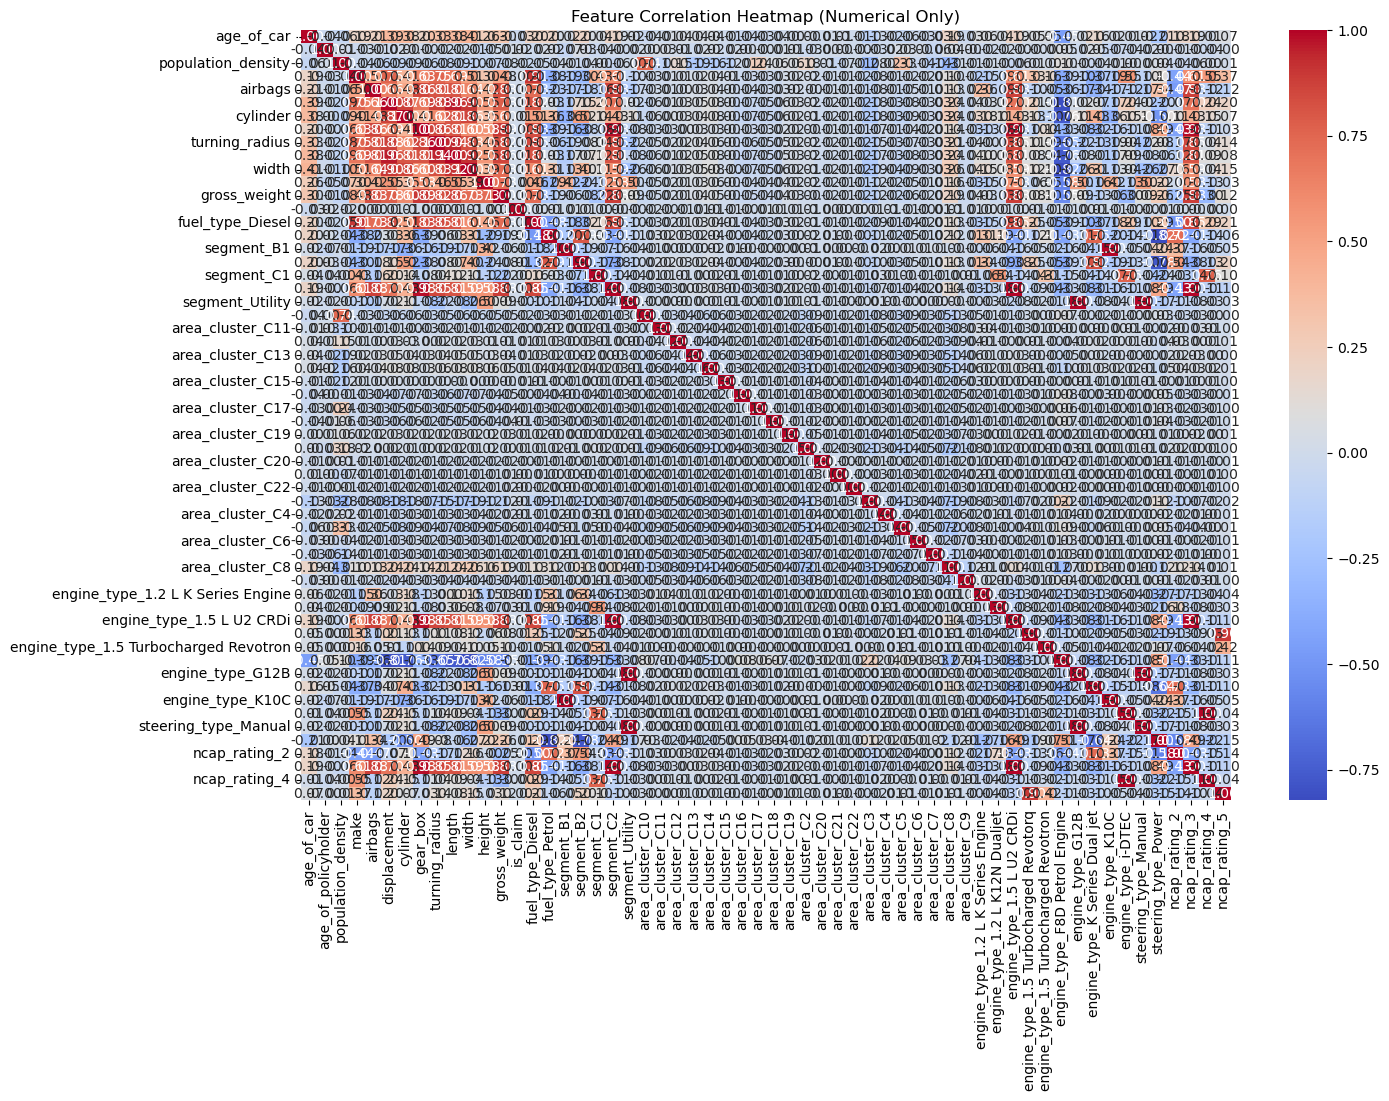

In [22]:
# Filter numeric columns only
numeric_data = data.select_dtypes(include=['int64', 'float64', 'bool'])

# Compute and plot correlation
plt.figure(figsize=(15, 10))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap (Numerical Only)")
plt.show()


In [23]:
# Sort correlations with target
correlation_with_target = correlation_matrix['is_claim'].sort_values(ascending=False)
print(correlation_with_target)

is_claim                                 1.000000
age_of_policyholder                      0.022435
area_cluster_C14                         0.013511
cylinder                                 0.013434
area_cluster_C8                          0.013295
segment_B2                               0.012714
area_cluster_C18                         0.011441
area_cluster_C2                          0.010607
width                                    0.009947
area_cluster_C3                          0.009759
engine_type_K Series Dual jet            0.009503
displacement                             0.007678
fuel_type_Petrol                         0.007253
length                                   0.006495
engine_type_1.5 Turbocharged Revotorq    0.005901
engine_type_1.2 L K12N Dualjet           0.005660
area_cluster_C19                         0.005574
area_cluster_C4                          0.005571
area_cluster_C22                         0.004418
area_cluster_C21                         0.004138


In [25]:
# Select only numeric columns (int, float, bool)
numeric_data = data.select_dtypes(include=['int64', 'float64', 'bool'])

# Calculate skewness
skewed_features = numeric_data.skew().sort_values(ascending=False)
print(skewed_features)


area_cluster_C20                         23.120781
area_cluster_C22                         16.735323
area_cluster_C18                         15.463896
engine_type_1.5 Turbocharged Revotron    12.586692
area_cluster_C21                         12.313025
area_cluster_C16                         11.963650
area_cluster_C17                         10.775149
area_cluster_C4                           9.226273
area_cluster_C15                          8.544699
area_cluster_C6                           7.927947
area_cluster_C19                          7.652825
engine_type_1.2 L K12N Dualjet            7.160535
engine_type_G12B                          6.744375
segment_Utility                           6.744375
steering_type_Manual                      6.744375
area_cluster_C11                          6.735479
area_cluster_C12                          5.822638
engine_type_1.5 Turbocharged Revotorq     5.804791
ncap_rating_5                             5.187932
ncap_rating_4                  

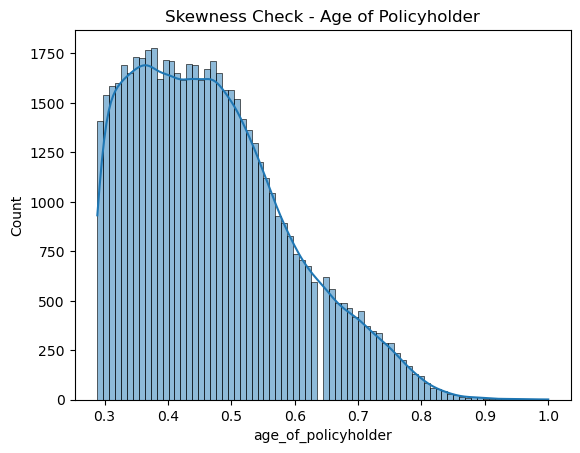

In [26]:
sns.histplot(data['age_of_policyholder'], kde=True)
plt.title("Skewness Check - Age of Policyholder")
plt.show()


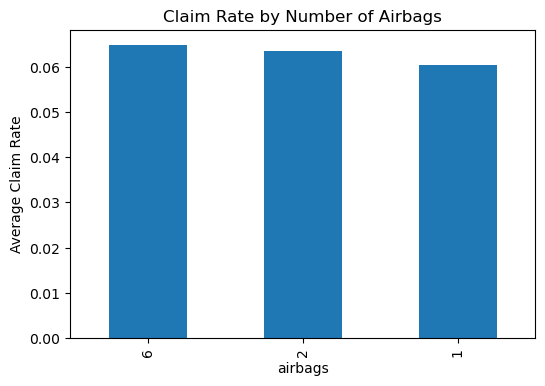

In [ ]:
# First undo label encoding just for this plot (if possible) Or use original column if backed up

claim_by_segment = data.groupby('airbags')['is_claim'].mean().sort_values(ascending=False)
claim_by_segment.plot(kind='bar', figsize=(6,4), title='Claim Rate by Number of Airbags')
plt.ylabel('Average Claim Rate')
plt.show()


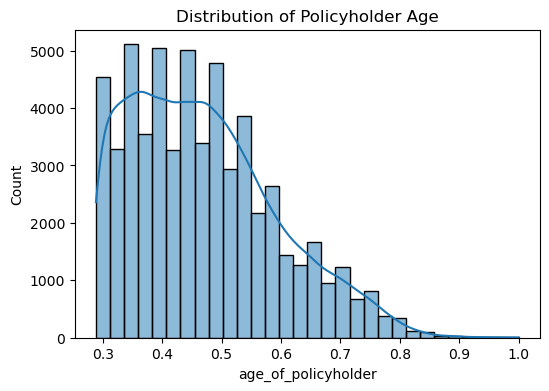

In [19]:
# Example: Age of policyholder
plt.figure(figsize=(6, 4))
sns.histplot(data['age_of_policyholder'], kde=True, bins=30)
plt.title("Distribution of Policyholder Age")
plt.show()
